In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('gdp_data.csv')
df.head()

,Country,Continent,GDP_PPP_2017,GDP_Real_Growth_Rate_2017,GDP_per_capita_PPP_2017
0,Afghanistan,Asia,6.945000e+10,2.7,2000.0
1,Albania,Europe,3.601000e+10,3.8,12500.0
2,Algeria,Africa,6.300000e+11,1.4,15200.0
3,American Samoa,Oceania,6.580000e+08,-2.5,11200.0
4,Andorra,Europe,3.327000e+09,-1.1,49900.0


In [2]:
# We want to cluster the countries from continents Africa and Europe
select_region = ['Africa','Europe']
# Filtering based on continent column
df = df[df['Continent'].isin(select_region)]
df.shape

(103, 5)

In [3]:
# NaN - missing values
df.isnull().sum()

Country                      0
Continent                    0
GDP_PPP_2017                 1
GDP_Real_Growth_Rate_2017    4
GDP_per_capita_PPP_2017      2
dtype: int64

In [7]:
# Dropping missing values
df = df.dropna()
df.shape
df

,Country,Continent,GDP_PPP_2017,GDP_Real_Growth_Rate_2017,GDP_per_capita_PPP_2017
1,Albania,Europe,3.601000e+10,3.8,12500.0
2,Algeria,Africa,6.300000e+11,1.4,15200.0
4,Andorra,Europe,3.327000e+09,-1.1,49900.0
5,Angola,Africa,1.936000e+11,-2.5,6800.0
14,Austria,Europe,4.410000e+11,3.0,50000.0
...,...,...,...,...,...
233,Uganda,Africa,8.919000e+10,4.8,2400.0
236,United Kingdom,Europe,2.925000e+12,1.7,44300.0
249,Zambia,Africa,6.893000e+10,3.4,4000.0
250,Zimbabwe,Africa,3.427000e+10,3.7,2300.0


In [8]:
# subset the dataframe with all rows except row country  value 'European Union', which is not a country
df = df[df['Country'] != 'European Union']

In [10]:
# to avoid old index getting added as a column we use drop=True
df = df.reset_index(drop=True)
df

,Country,Continent,GDP_PPP_2017,GDP_Real_Growth_Rate_2017,GDP_per_capita_PPP_2017
0,Albania,Europe,3.601000e+10,3.8,12500.0
1,Algeria,Africa,6.300000e+11,1.4,15200.0
2,Andorra,Europe,3.327000e+09,-1.1,49900.0
3,Angola,Africa,1.936000e+11,-2.5,6800.0
4,Austria,Europe,4.410000e+11,3.0,50000.0
...,...,...,...,...,...
92,Tunisia,Africa,1.377000e+11,2.0,11900.0
93,Uganda,Africa,8.919000e+10,4.8,2400.0
94,United Kingdom,Europe,2.925000e+12,1.7,44300.0
95,Zambia,Africa,6.893000e+10,3.4,4000.0


In [11]:
x = df[['GDP_PPP_2017', 'GDP_Real_Growth_Rate_2017']].values
y = df['Country'].values
print(x[0:5,:])

[[ 3.601e+10  3.800e+00]
 [ 6.300e+11  1.400e+00]
 [ 3.327e+09 -1.100e+00]
 [ 1.936e+11 -2.500e+00]
 [ 4.410e+11  3.000e+00]]


In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #normally fit to -2 to 2
x = scaler.fit_transform(x)
# Normalizing the Data
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()   #mean = 0
x = normalizer.fit_transform(x)
print(x[0:5,:])

[[-0.99972146  0.02360073]
 [ 0.86505508 -0.50167689]
 [-0.51925599 -0.85461875]
 [-0.1307495  -0.99141544]
 [ 0.93386971 -0.35761344]]


In [13]:
# DB Scan Clustering, centroid
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples = 4)
clusters = dbscan.fit_predict(x)

In [14]:
set(clusters)

{-1, 0, 1}

In [15]:
dbscan_cluster1 = list(y[clusters==0])
dbscan_cluster2 = list(y[clusters==1])
dbscan_cluster3 = list(y[clusters==2])
dbscan_cluster4 = list(y[clusters==-1])
dbscan_cluster4

['Czechia',
 'Denmark',
 'Ethiopia',
 'Greece',
 'Hungary',
 'Ireland',
 'Libya',
 'Morocco',
 'Norway',
 'Portugal',
 'Romania']

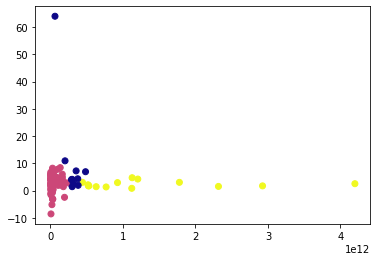

In [12]:
# Plotting the DBSCAN Clusters
plt.scatter(df[['GDP_PPP_2017']],df[['GDP_Real_Growth_Rate_2017']], c=clusters, cmap="plasma")

C:\Users\brian\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


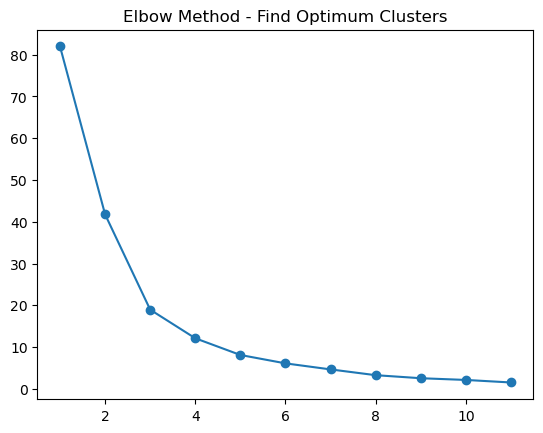

In [16]:
# K-Means Clustering
from sklearn.cluster import KMeans
wcss = []
for i in range(1,12):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)    
plt.plot(range(1,12), wcss, marker = "o")
plt.title('Elbow Method - Find Optimum Clusters')
plt.show()

In [17]:
# Develop the K-Means Clustering Model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x)

In [18]:
set(y_kmeans)

{0, 1, 2, 3}

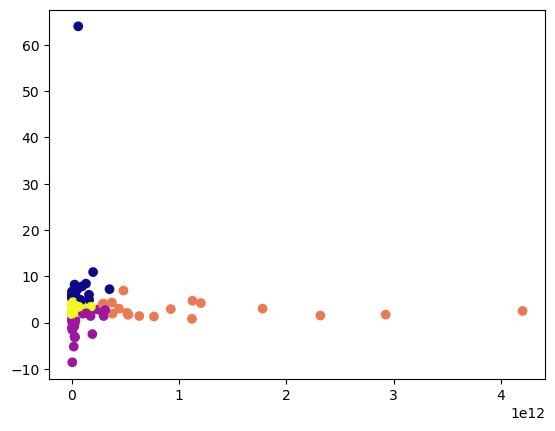

In [19]:
# Plotting the four clusters - K-Means
plt.scatter(df[['GDP_PPP_2017']],df[['GDP_Real_Growth_Rate_2017']], c=y_kmeans, cmap="plasma")

In [20]:
kmeans_cluster1 = list(y[y_kmeans == 0])
kmeans_cluster2 = list(y[y_kmeans == 1])
kmeans_cluster3 = list(y[y_kmeans == 2])
kmeans_cluster4 = list(y[y_kmeans == 3])
kmeans_cluster1

['Benin',
 'Burkina Faso',
 "Cote D'Ivoire",
 'Djibouti',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Faroe Islands',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Ireland',
 'Kenya',
 'Libya',
 'Mali',
 'Malta',
 'Monaco',
 'Niger',
 'Rwanda',
 'Senegal',
 'Seychelles',
 'Slovenia',
 'Tanzania',
 'Uganda']

In [21]:
# We can observe there are outliers in the data
# Let us now remove outliers
# Finding outliers in column - GDP_PPP_2017
Q1 = df['GDP_PPP_2017'].quantile(0.25)
Q3 = df['GDP_PPP_2017'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['GDP_PPP_2017'] >= Q1 - 1.5 * IQR) & (df['GDP_PPP_2017'] <= Q3 + 1.5 *IQR)
outliers_gdp_ppp = df.loc[~filter]
df = df.loc[filter]

In [22]:
# Finding outliers in column - GDP_Real_Growth_Rate_2017
Q1 = df['GDP_Real_Growth_Rate_2017'].quantile(0.25)
Q3 = df['GDP_Real_Growth_Rate_2017'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['GDP_Real_Growth_Rate_2017'] >= Q1 - 1.5 * IQR) & (df['GDP_Real_Growth_Rate_2017'] <= Q3 + 1.5 *IQR)
outliers_gdp_real_growth = df.loc[~filter]
df = df.loc[filter]

In [23]:
# Repeat the whole process after removing outliers
x = df[['GDP_PPP_2017', 'GDP_Real_Growth_Rate_2017']].values
y = df['Country'].values
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
# Normalizing the Data
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
x = normalizer.fit_transform(x)

In [24]:
# Develop the K-Means Clustering Model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x)

In [25]:
set(y_kmeans)

{0, 1, 2, 3}

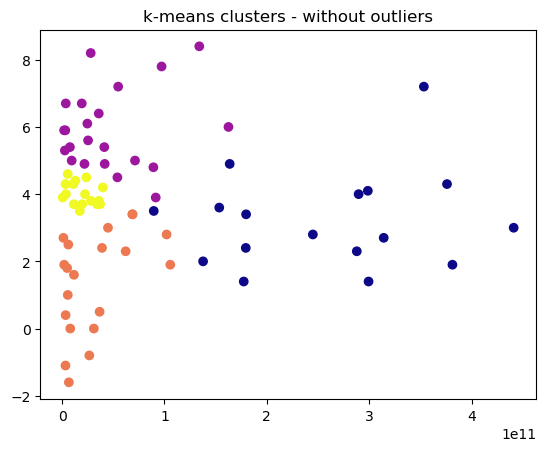

In [26]:
# Plotting the four clusters - K-Means
plt.scatter(df[['GDP_PPP_2017']],df[['GDP_Real_Growth_Rate_2017']], c=y_kmeans, cmap="plasma")
plt.title('k-means clusters - without outliers')
plt.show()

In [27]:
kmeans_cluster1_no_outliers = list(y[y_kmeans == 0])
kmeans_cluster2_no_outliers = list(y[y_kmeans == 1])
kmeans_cluster3_no_outliers= list(y[y_kmeans == 2])
kmeans_cluster4_no_outliers = list(y[y_kmeans == 3])


In [28]:
kmeans_cluster4_no_outliers

['Albania',
 'Cabo Verde',
 'Central African Republic',
 'Gambia, The',
 'Kosovo',
 'Madagascar',
 'Malawi',
 'Mauritania',
 'Mauritius',
 'Moldova',
 'Montenegro',
 'Mozambique',
 'Sao Tome And Principe',
 'Sierra Leone',
 'Togo',
 'Zimbabwe']